# TMNIST (Typeface MNIST)

# Abstract

The dataset consists of a collection of digital images depicting numeric digits, with values ranging from 0 to 9. The images were created using a total of 2,990 font files obtained from Google. This dataset is inspired by the widely recognized MNIST database, which also comprises images of handwritten numerical digits.

The dataset encompasses a total of 29,900 samples, each annotated with a corresponding numerical label and the name of the font that was utilized to generate the image. The dataset is organized such that every row consists of 786 features: the first feature designates the font name (e.g., Chivo-Italic, Sen-Bold), the second feature designates the label (a digit between 0 and 9), and the remaining 784 features denote the grayscale pixel values (ranging from 0 to 255) that collectively form a 28x28 pixel image.

Kaggle Link: https://www.kaggle.com/datasets/nimishmagre/tmnist-typeface-mnist

## Installing all the required Libraries

In [1]:
!pip install numpy
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from keras.datasets import mnist

# from keras.utils import to_categorical
import numpy as np

# from tensorflow.keras.utils import to_categorical
from keras.models import Sequential

# from keras.utils.np_utils import to_categorical
from keras.utils import np_utils
from keras import layers
from keras import models
import tensorflow

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## Importing Data

In [4]:
np.random.seed(99)
ds = pd.read_csv('https://raw.githubusercontent.com/Shreyasi632/Neural_Network/main/TMNIST_Data%20-%20Typeface_MNIST.csv')
list_ = ds.values.tolist()

data = []
c = []
d = []
training_data = []
training_label = []
test_data = []
test_label = []

Initializing empty lists called data, c, d, train_data, train_label, test_data and test_label that will be used to store the data.

In [5]:
for i in range(len(list_)):
    label = list_[i][1]
    a = list_[i][2:]
    a = np.array(a)
    a = a.reshape(28, 28).tolist()
    c.append(a)
    d.append(label)
training_data, test_data, training_label, test_label = train_test_split(
    c, d, test_size=0.25, random_state=1
)

The above code loops over each row in the dataset, extract the label and image data, reshape the image data to a 28x28 matrix, convert it to a list, and append them to the c and d lists, respectively. Further the code splits the c and d lists into training and testing sets in a ratio of 1:4.

In [6]:
# Checking the length of training and test dataset
print("Length of Training dataset: ", len(training_data))
print("Length of Test dataset: ", len(test_data))

Length of Training dataset:  22425
Length of Test dataset:  7475


In [7]:
ds['names'].value_counts()

GrandHotel-Regular          10
Laila-Regular               10
Tajawal-Medium              10
Numans-Regular              10
PT_Sans-Web-Italic          10
                            ..
Thasadith-Bold              10
CherryBomb-Regular          10
NotoSansOriyaUI-Thin        10
Kodchasan-SemiBoldItalic    10
AveriaSerifLibre-Ligh       10
Name: names, Length: 2990, dtype: int64

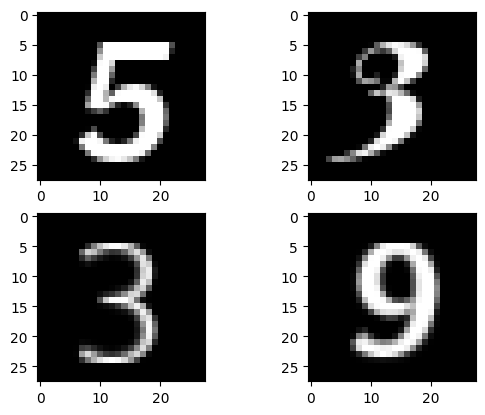

In [8]:
# plotting 4 images in a 2x2 grid
plt.subplot(221)
plt.imshow(training_data[0], cmap=plt.get_cmap("gray"))
plt.subplot(222)
plt.imshow(training_data[1], cmap=plt.get_cmap("gray"))
plt.subplot(223)
plt.imshow(training_data[2], cmap=plt.get_cmap("gray"))
plt.subplot(224)
plt.imshow(training_data[3], cmap=plt.get_cmap("gray"))
plt.show()

The elements at 0,1,2 and 3 index of the training_data list have be plotted.

## Data Preprocessing

Converting training_data, test_data, training_label and test_label to array so that they can be used as input to neural network 

In [9]:
# Convert the list for data preprocessing
training_data = np.array(training_data)
test_data = np.array(test_data)
training_label = np.array(training_label)
test_label = np.array(test_label)

## Reshaping the train and test data 

In [11]:
#Reshaping the training and test data and converting it in standardized float format 
training_data = training_data.reshape((22425, 28, 28, 1))
training_data = training_data.astype('float32') / 255

test_data = test_data.reshape((7475, 28, 28, 1))
test_data = test_data.astype('float32') / 255

# Convert class vector to a binary class
training_label = tensorflow.keras.utils.to_categorical(training_label)
test_label = tensorflow.keras.utils.to_categorical(test_label)

The above code reshapes the train and test data to the desired shape and converts it into a standardized float format. It also converts the class vector into a binary class using the to_categorical function from the tensorflow.keras.utils 

## Building the Model
Building a sequential CNN model with 2 layers with a pool size of 3 * 3 to calculate the maximum/largest value in the map with 1 input and 1 output layer. ReLU is used as an activation fuction which performs on multi layer Neural Network for better performance on 28*28 input frame. finally we are using Softmax function in the output laye to turn vector of real value to probability distribution.

In [12]:
# Using Sequential model
model = models.Sequential()

#1st layer using a 3*3 kernel, a 2*2 pool, and a ReLU activation function for a 28*28 shape input image
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

#2nd layer using a 3*3 kernel, a 2*2 pool, and a ReLU activation function for a 28*28 shape input image
model.add(layers.Conv2D(64, (3, 3), activation="relu"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation="relu"))

#Flattening the inputs
model.add(layers.Flatten())

#Densely connected NN
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

The model has a total of 93,322 parameters, which are all trainable. The network design is composed of two convolutional layers, two max-pooling layers, and one dense layer at the bottom. 



- The first convolutional layer has 32 filters with a kernel size of 3x3 and ReLU activation function.  The output shape of this layer is (None, 26, 26, 32), which means that it takes an input with a shape of (None, 28, 28, 1) and produces a feature map with a shape of (None, 26, 26, 32).

- The max-pooling layer has a pool size of 2x2, which reduces the dimensions of the feature maps by half. The output shape of this layer is (None, 13, 13, 32).

- The second convolutional layer has 64 filters with a kernel size of 3x3 and ReLU activation function. Another max-pooling layer is then applied with the same pool size of 2x2. A third convolutional layer with 64 filters and a kernel size of 3x3 is then added to the model.

- The output of the convolutional layers is flattened into a 1D array with a shape of (None, 576) using the Flatten layer, and then passed through two dense layers with ReLU activation function. 

- The final dense layer has 10 neurons, corresponding to the 10 possible image categories, and uses the softmax activation function to output a probability distribution over the categories.

## Training the Model

These two lines of code compile and train the model respectively. We will be using rmsprop optimizer with categorical_crossentropy loss function and Accuracy for performance metrics. The fit() function trains the model on the training dataset. The training_data and training_label are the input and output data respectively, while the validation_split parameter specifies the fraction of the training data to be used as validation data during training. The epochs parameter specifies the number of times the model is trained on the entire dataset, while the batch_size parameter specifies the number of samples used in each training iteration.

In this case we are using 20% validation split and 5 Epochs with 64 batch size input. At each iteration, we can see that Accuracy is increasing and loss is decreasing in both training and validation

In [13]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(training_data, training_label, validation_split=0.20,epochs=5, batch_size=64)

Epoch 1/5
281/281 [==============================] - 23s 78ms/step - loss: 0.2793 - accuracy: 0.9158 - val_loss: 0.1662 - val_accuracy: 0.9494
Epoch 2/5
281/281 [==============================] - 28s 101ms/step - loss: 0.0657 - accuracy: 0.9803 - val_loss: 0.0560 - val_accuracy: 0.9833
Epoch 3/5
281/281 [==============================] - 19s 68ms/step - loss: 0.0437 - accuracy: 0.9874 - val_loss: 0.0576 - val_accuracy: 0.9857
Epoch 4/5
281/281 [==============================] - 21s 75ms/step - loss: 0.0298 - accuracy: 0.9905 - val_loss: 0.0743 - val_accuracy: 0.9799
Epoch 5/5
281/281 [==============================] - 19s 68ms/step - loss: 0.0222 - accuracy: 0.9928 - val_loss: 0.0525 - val_accuracy: 0.9877


This output shows the training and validation accuracy and loss for each epoch of the training process.

- In the first epoch, for instance, the training loss was 0.2793 and the accuracy of the training was 0.9158, while the validation loss was 0.1662 and the accuracy of the validation was 0.9494. Hence, the model demonstrated good performance on both the training and validation sets, with a little greater accuracy on the training set.

- The results for the other epochs demonstrate how the model's performance increased over time in a similar manner. For example, in the second epoch, the loss dropped while the training and validation accuracy climbed to 0.9803 and 0.9833, respectively.

During the course of the five epochs, the loss dropped while the training and validation accuracy increased overall, suggesting that the model is adapting to the task and getting better at it.

## Visualizing the Model

Plotting the training loss and accuracy over the number of epochs.

<ipython-input-14-768f9ee2654c>:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, "b", label="Training loss", color="r")


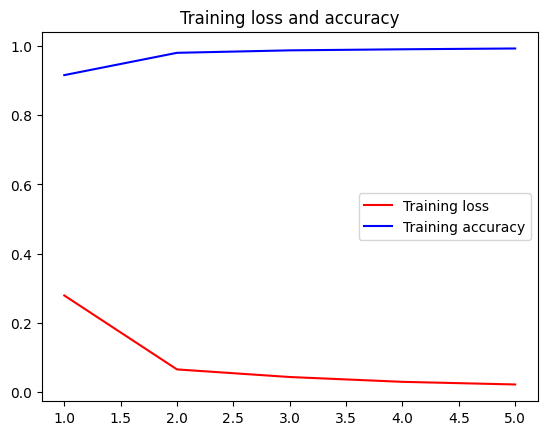

In [14]:
loss = history.history["loss"]
acc = history.history["accuracy"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "b", label="Training loss", color="r") # plots the training loss as a red line with "Training loss" as its label
plt.plot(epochs, acc, "b", label="Training accuracy") # plots the training accuracy as a blue line with "Training accuracy" as its label
plt.title("Training loss and accuracy") # sets the title of the plot.
plt.legend() # adds a legend to the plot
plt.show()

## Evaluating Model Accuracy on Test Data

In [15]:
test_loss, test_accuracy = model.evaluate(test_data, test_label)
print("Model Accuracy is: ", test_accuracy)

234/234 [==============================] - 3s 12ms/step - loss: 0.0440 - accuracy: 0.9892
Model Accuracy:  0.989163875579834


During the evaluation on the test dataset, the model achieved an accuracy of 0.9891 and a loss of 0.0440. This means that the model predicted the correct label for 98.91% of the test images which is pretty good for 2 layer CNN

# Conclusion

